In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

My data consists of three csv files: "authors.csv", "papers.csv", and "paper_authors.csv" to connect the two. This first part of the notebook will be looking at "papers.csv". 

In [2]:
papers = pd.read_csv('E:/OtherCodeProjects/Springboard Capstone Projects/Springboard-Capstone-1-Data/papers.csv')

Looking at the head of the data, I can see that pdf_name is just a combination of title and id. There are also several NaNs in event_type and abstract. The paper_text field does contain the full text of each paper. 

In [3]:
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


The dataset has 7241 papers in total, and 7 columns of information. Only event_type has listed NaNs, but I know that at least abstract has missing information as well

In [4]:
papers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7241 entries, 0 to 7240
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          7241 non-null   int64 
 1   year        7241 non-null   int64 
 2   title       7241 non-null   object
 3   event_type  2422 non-null   object
 4   pdf_name    7241 non-null   object
 5   abstract    7241 non-null   object
 6   paper_text  7241 non-null   object
dtypes: int64(2), object(5)
memory usage: 396.1+ KB


Here we see that poster is the most common event after NaN. Also, 3317 of the papers have their abstracts missing, and one that seems duplicated after that. Interestingly, 4 paper texts seem to be duplicated.

In [5]:
papers.describe(include='all')

,id,year,title,event_type,pdf_name,abstract,paper_text
count,7241.000000,7241.000000,7241,2422,7241,7241,7241
unique,NaN,NaN,7241,3,7241,3923,7237
top,NaN,NaN,Self-Organization of Associative Database and ...,Poster,1-self-organization-of-associative-database-an...,Abstract Missing,Emergence of Object-Selective Features in\nUns...
freq,NaN,NaN,1,2146,1,3317,2
mean,3655.912167,2006.439718,NaN,NaN,NaN,NaN,NaN
std,2098.435219,8.759919,NaN,NaN,NaN,NaN,NaN
min,1.000000,1987.000000,NaN,NaN,NaN,NaN,NaN
25%,1849.000000,2000.000000,NaN,NaN,NaN,NaN,NaN
50%,3659.000000,2009.000000,NaN,NaN,NaN,NaN,NaN
75%,5473.000000,2014.000000,NaN,NaN,NaN,NaN,NaN


After filling NaNs with the string "N/A", we see that "N/A" is the most common event, followed by a healthy amount of posters. Spotlights and oral presentations are less common.

In [6]:
event_types = papers.fillna('N/A').groupby(by='event_type')['id'].count().sort_values(ascending=False).to_frame()
event_types

,id
event_type,
N/A,4819
Poster,2146
Spotlight,181
Oral,95


Here are the duplicated paper texts. They seem to be the same paper with different titles attached. For some reason two have no paper text at all, even though the .info showed no null values in that field.

In [7]:
papers[papers['paper_text'].duplicated(keep=False)]

,id,year,title,event_type,pdf_name,abstract,paper_text
631,1578,1998,Dynamics of Supervised Learning with Restricte...,NaN,1578-dynamics-of-supervised-learning-with-rest...,Abstract Missing,Dynamics of Supervised Learning with\nRestrict...
632,1579,1998,Discovering Hidden Features with Gaussian Proc...,NaN,1579-discovering-hidden-features-with-gaussian...,Abstract Missing,Dynamics of Supervised Learning with\nRestrict...
3862,4497,2012,Emergence of Object-Selective Features in Unsu...,NaN,4497-emergence-of-object-selective-features-in...,Recent work in unsupervised feature learning h...,Emergence of Object-Selective Features in\nUns...
4109,4719,2012,"Burn-in, bias, and the rationality of anchoring",NaN,4719-burn-in-bias-and-the-rationality-of-ancho...,Bayesian inference provides a unifying framewo...,Emergence of Object-Selective Features in\nUns...
5583,6052,2016,Only H is left: Near-tight Episodic PAC RL,Poster,6052-only-h-is-left-near-tight-episodic-pac-rl...,In many applications such as advertisement pla...,Launch and Iterate: Reducing Prediction Churn\...
5584,6053,2016,Launch and Iterate: Reducing Prediction Churn,Poster,6053-launch-and-iterate-reducing-prediction-ch...,Practical applications of machine learning oft...,Launch and Iterate: Reducing Prediction Churn\...
5722,6178,2016,Regret Bounds for Non-decomposable Metrics wit...,Poster,6178-regret-bounds-for-non-decomposable-metric...,We consider the problem of recommending releva...,
6499,6879,2017,Mean Field Residual Networks: On the Edge of C...,Poster,6879-mean-field-residual-networks-on-the-edge-...,We study randomly initialized residual network...,


Here I am plotting number of papers by year. There is an increase after ~2008 and a sharp increase after 2015, either because the conference became more popular or because more papers were published/recorded online.

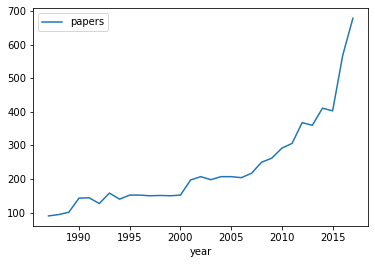

In [8]:
papers_per_year = papers.groupby(by='year')['id'].count().to_frame()
papers_per_year.reset_index(inplace=True)
papers_per_year.plot(x='year', y='id')
plt.legend(['papers'])

The dataset is fairly modern, ~43% of it was written after 2010.

In [9]:
papers_per_year['id'][papers_per_year['year']>2010].sum() / 7241

0.4275652534180362

Most of the papers with missing abstracts were written before 2005, and none of the most recent papers have missing abstracts. The abstracts themselves are likely still in the paper text itself, they just likely weren't recorded seperately before 2005

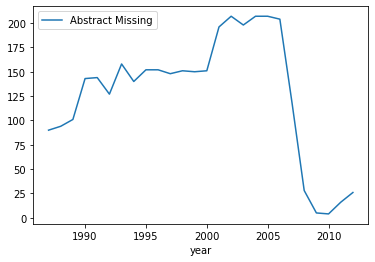

In [10]:
abstract_missing_year = papers.query('abstract == "Abstract Missing"').groupby(by='year')['abstract'].count().to_frame()
abstract_missing_year.reset_index(inplace=True)
abstract_missing_year.plot(x='year', y='abstract')
plt.legend(['Abstract Missing'])

This plot of # of abstracts missing divided by the total number of papers that year confirms my suspicion that abstracts werent recorded seperately before 2005, minus a few outliers.

<AxesSubplot:xlabel='year'>

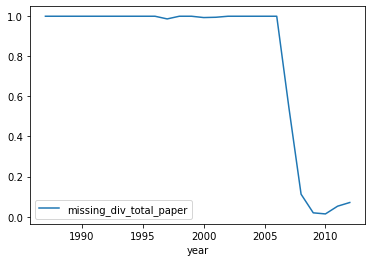

In [11]:
abstract_missing_year['missing_div_total_paper'] = abstract_missing_year['abstract'] / papers_per_year['id']

abstract_missing_year.plot(x='year', y='missing_div_total_paper')

This next segment will deal with the "authors.csv" file.

In [12]:
authors = pd.read_csv('E:/OtherCodeProjects/Springboard Capstone Projects/Springboard-Capstone-1-Data/authors.csv')

The dataset itself just consists of author names in plaintext, and an associated id.

In [13]:
authors.head()

,id,name
0,1,Hisashi Suzuki
1,10,David Brady
2,100,Santosh S. Venkatesh
3,1000,Charles Fefferman
4,10000,Artur Speiser


I don't see any obviously missing values, and there are a total of 9784 authors listed. More than the number of papers, which is to be expected. 

In [14]:
authors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9784 entries, 0 to 9783
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      9784 non-null   int64 
 1   name    9784 non-null   object
dtypes: int64(1), object(1)
memory usage: 153.0+ KB


I can see that there are a number of authors with the same name, and it will be very difficult to know if they are one person or multiple people that share a name

In [15]:
authors.describe(include='all')

,id,name
count,9784.000000,9784
unique,NaN,9719
top,NaN,Stella X. Yu
freq,NaN,3
mean,5213.869276,NaN
std,3101.338416,NaN
min,1.000000,NaN
25%,2506.750000,NaN
50%,4958.500000,NaN
75%,8021.250000,NaN


Luckily, all of the duplicated names are duplicated only two or three times.

In [16]:
duplicate_authors = authors[authors['name'].duplicated(keep=False)].groupby(by='name')['id'].count().sort_values(ascending=False).to_frame()
duplicate_authors.reset_index(inplace=True)
duplicate_authors.rename(columns={"id":"count"}, inplace=True)
duplicate_authors

,name,count
0,Daniel D. Lee,3
1,Stella X. Yu,3
2,Abhradeep Guha Thakurta,2
3,Murat A. Erdogdu,2
4,Quoc V. Le,2
...,...,...
58,Jianbo Shi,2
59,Jo?o F. Henriques,2
60,Joachim M. Buhmann,2
61,Joaquin Qui?onero Candela,2


Saving the duplicate names for later checking

In [17]:
duplicate_names = []
for name in duplicate_authors['name']:
    duplicate_names.append(name)

This part of the notebook takes a look at the "paper_authors.csv" dataset.

In [18]:
paper_authors = pd.read_csv('E:/OtherCodeProjects/Springboard Capstone Projects/Springboard-Capstone-1-Data/paper_authors.csv')

As expected, the dataframe consists of a paper_id and a matching author_id. Authors have written multiple papers and papers have multiple authors.

In [19]:
paper_authors.head()

,id,paper_id,author_id
0,1,63,94
1,2,80,124
2,3,80,125
3,4,80,126
4,5,80,127


There are 20838 paper-author combinations, and no apparent null values.

In [20]:
paper_authors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20838 entries, 0 to 20837
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         20838 non-null  int64
 1   paper_id   20838 non-null  int64
 2   author_id  20838 non-null  int64
dtypes: int64(3)
memory usage: 488.5 KB


Grouping by authors, I can see a few that have written more than 50 papers, but most have probably written only 1 or 2. I have the expected 9784 authors in this dataset.

In [21]:
papers_per_auth = paper_authors.groupby(by='author_id')['paper_id'].count().sort_values(ascending=False).to_frame()
papers_per_auth.reset_index(inplace=True)
papers_per_auth.rename(columns={"paper_id":"count"}, inplace=True)
papers_per_auth

,author_id,count
0,330,79
1,1472,62
2,178,60
3,121,58
4,1020,51
...,...,...
9779,4228,1
9780,4226,1
9781,4222,1
9782,4221,1


The most prolific author in the dataset is Michael I. Jordan, I can start the project just trying to predict his papers. 

In [22]:
authors.query('id == 330')

,id,name
3007,330,Michael I. Jordan


Here are the top 5 prolific authors, I will focus on these in the final analysis

In [23]:
top_five = authors[authors['id'].isin([330, 1472, 178, 121, 1020])]
top_five

,id,name
223,1020,Zoubin Ghahramani
701,121,Geoffrey E. Hinton
992,1472,Bernhard Sch?lkopf
1332,178,Yoshua Bengio
3007,330,Michael I. Jordan


Our top author is duplicated! 

In [24]:
top_five[top_five['name'].isin(duplicate_names)]

,id,name
3007,330,Michael I. Jordan


In [25]:
authors.query('name == "Michael I. Jordan"')

,id,name
3007,330,Michael I. Jordan
5790,6338,Michael I. Jordan


This "other" Michael Jordan wrote 22 papers, but after some googling I am going to assume they are the same person.

In [26]:
papers_per_auth.query('author_id == 6338')

,author_id,count
47,6338,22


The "old" Michael Jordan's papers stop in 2012, and the "new" Jordan's papers start in 2013, so this seems like an error was made in the data scraping.

In [27]:
auth_6338 = paper_authors.query('author_id==6338')
papers_6338 = []
for paper_id in auth_6338.paper_id:
    papers_6338.append(paper_id)

papers_6338_df = papers[papers['id'].isin(papers_6338)]
papers_6338_df.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
4312,4902,2013,Information-theoretic lower bounds for distrib...,Oral,4902-information-theoretic-lower-bounds-for-di...,We establish minimax risk lower bounds for dis...,Information-theoretic lower bounds for distrib...
4352,4939,2013,"Estimation, Optimization, and Parallelism when...",Poster,4939-estimation-optimization-and-parallelism-w...,We study stochastic optimization problems when...,"Estimation, Optimization, and Parallelism when..."
4397,4980,2013,Streaming Variational Bayes,Poster,4980-streaming-variational-bayes.pdf,"We present SDA-Bayes, a framework for (S)tream...","Streaming Variational Bayes\nTamara Broderick,..."
4435,5013,2013,Local Privacy and Minimax Bounds: Sharp Rates ...,Poster,5013-local-privacy-and-minimax-bounds-sharp-ra...,We provide a detailed study of the estimation ...,Local Privacy and Minimax Bounds:\nSharp Rates...
4462,5038,2013,Optimistic Concurrency Control for Distributed...,Poster,5038-optimistic-concurrency-control-for-distri...,Research on distributed machine learning algor...,Optimistic Concurrency Control for\nDistribute...


In [28]:
auth_330 = paper_authors.query('author_id==330')
papers_330 = []
for paper_id in auth_330.paper_id:
    papers_330.append(paper_id)

papers_330_df = papers[papers['id'].isin(papers_330)]
papers_330_df.sort_values(by='year', ascending=False).head()

,id,year,title,event_type,pdf_name,abstract,paper_text
4257,4853,2012,Small-Variance Asymptotics for Exponential Fam...,NaN,4853-small-variance-asymptotics-for-exponentia...,Links between probabilistic and non-probabilis...,Small-Variance Asymptotics for Exponential Fam...
4058,4673,2012,Ancestor Sampling for Particle Gibbs,NaN,4673-ancestor-sampling-for-particle-gibbs.pdf,We present a novel method in the family of par...,Ancestor Sampling for Particle Gibbs\n\nFredri...
3922,4550,2012,Finite Sample Convergence Rates of Zero-Order ...,NaN,4550-finite-sample-convergence-rates-of-zero-o...,We consider derivative-free algorithms for sto...,Finite Sample Convergence Rates of Zero-Order\...
3872,4505,2012,Privacy Aware Learning,NaN,4505-privacy-aware-learning.pdf,We study statistical risk minimization problem...,Privacy Aware Learning\n\n1\n\nJohn C. Duchi1\...
3850,4486,2011,Divide-and-Conquer Matrix Factorization,NaN,4486-divide-and-conquer-matrix-factorization.pdf,This work introduces Divide-Factor-Combine (DF...,Divide-and-Conquer Matrix Factorization\nLeste...


Ading the new papers to the old author id

In [29]:
paper_authors.author_id.replace(6338, 330, inplace=True)
papers_per_auth = paper_authors.groupby(by='author_id')['paper_id'].count().sort_values(ascending=False).to_frame()
papers_per_auth.reset_index(inplace=True)
papers_per_auth.rename(columns={"paper_id":"count"}, inplace=True)
papers_per_auth.head()

,author_id,count
0,330,101
1,1472,62
2,178,60
3,121,58
4,1020,51


The average author wrote just over two papers, but the vast majority have only one or two. 

In [30]:
papers_per_auth.describe(include='all')

,author_id,count
count,9783.000000,9783.000000
mean,5213.754370,2.130021
std,3101.476106,3.300103
min,1.000000,1.000000
25%,2506.500000,1.000000
50%,4958.000000,1.000000
75%,8021.500000,2.000000
max,10482.000000,101.000000


The distribution of papers per author tails off very quickly, the number of authors writing more than 10 papers is almost invisible on this graph.

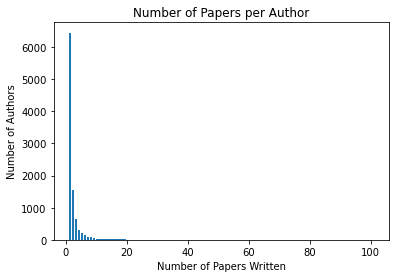

In [70]:
plt.hist(papers_per_auth['count'], bins=101, rwidth=0.8)
plt.title('Number of Papers per Author')
plt.ylabel('Number of Authors')
plt.xlabel('Number of Papers Written')
plt.show()

"Zooming in" on authors who wrote at least 5 papers, this trend continues. Although there are at least some authors who wrote between 10 and 20 papers. 

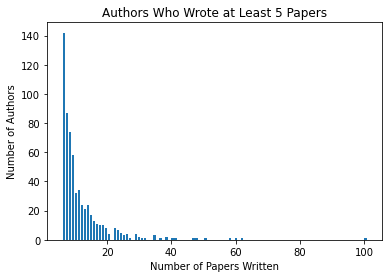

In [69]:
plt.hist(papers_per_auth.query('count > 5')['count'], bins=101, rwidth=0.8)
plt.title('Authors Who Wrote at Least 5 Papers')
plt.ylabel('Number of Authors')
plt.xlabel('Number of Papers Written')
plt.show()

There are 828 authors who wrote at least 5 papers, and 260 who wrote at least 10. The final model will only focus on the top 3-5 authors, as trying to predict on such an imbalanced dataset is difficult already

In [33]:
papers_per_auth.query('count >= 5').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827 entries, 0 to 826
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   author_id  827 non-null    int64
 1   count      827 non-null    int64
dtypes: int64(2)
memory usage: 19.4 KB


In [34]:
papers_per_auth.query('count >= 10').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259 entries, 0 to 258
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   author_id  259 non-null    int64
 1   count      259 non-null    int64
dtypes: int64(2)
memory usage: 6.1 KB


This is taking a look at the number of authors per paper. Papers with more authors will likely be less predictive, as it decreases the chance they wrote any given part of it. 

In [35]:
auth_per_paper = paper_authors.groupby(by='paper_id')['author_id'].count().sort_values(ascending=False).to_frame()
auth_per_paper.reset_index(inplace=True)
auth_per_paper.rename(columns={"author_id":"count"}, inplace=True)
auth_per_paper

,paper_id,count
0,2889,18
1,7152,15
2,6771,13
3,4687,12
4,4016,12
...,...,...
7233,2451,1
7234,4374,1
7235,4376,1
7236,1645,1


The average paper has just under 3 authors, but with a small standard deviation around that number.

In [36]:
auth_per_paper.describe(include='all')

,paper_id,count
count,7238.000000,7238.000000
mean,3654.690108,2.878972
std,2097.995851,1.358598
min,1.000000,1.000000
25%,1848.250000,2.000000
50%,3657.500000,3.000000
75%,5470.750000,4.000000
max,7284.000000,18.000000


This grouping has a more "normal" distribution centered between two and three authors, though there is still a tail all the way out to 18 authors.

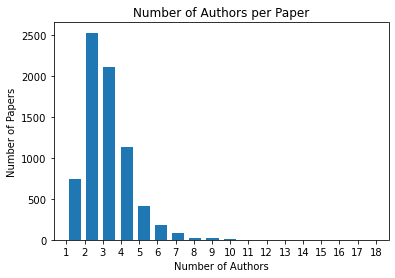

In [67]:
xticks = range(1, 19)
plt.hist(auth_per_paper['count'], bins=18, rwidth=0.7)
plt.xticks(xticks)
plt.title('Number of Authors per Paper')
plt.ylabel('Number of Papers')
plt.xlabel('Number of Authors')
plt.show()

This section is about joining the two main datasets together so I can have both paper and author id in one entry. The way this merge was performed duplicated the papers for each additional author, this will have to be corrected before the final modeling. 

In [38]:
papers_and_authors = papers.merge(paper_authors, left_on='id', right_on='paper_id', suffixes=('_paper', '_author'))\
    .drop(['id_paper', 'id_author'], axis=1)
papers_and_authors.head()

,year,title,event_type,pdf_name,abstract,paper_text,paper_id,author_id
0,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,1,1
1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,1,2
2,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,10,14
3,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,100,155
4,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,100,54


There are 20838 total entries as expected from the paper_authors dataset, and no additonal nulls outside of the event_type column. 

In [39]:
papers_and_authors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20838 entries, 0 to 20837
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        20838 non-null  int64 
 1   title       20838 non-null  object
 2   event_type  8151 non-null   object
 3   pdf_name    20838 non-null  object
 4   abstract    20838 non-null  object
 5   paper_text  20838 non-null  object
 6   paper_id    20838 non-null  int64 
 7   author_id   20838 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 1.4+ MB


Double checking with the "papers" dataset, however, reveals that three papers did not make the merge. Possibly because they had no listed authors. 

In [40]:
outer_join = papers.merge(papers_and_authors, on='pdf_name', how='left', indicator=True)
df_loc = outer_join.loc[outer_join['_merge']=='left_only', 'pdf_name']
missing_papers = papers[papers['pdf_name'].isin(df_loc)]
missing_papers

,id,year,title,event_type,pdf_name,abstract,paper_text
5583,6052,2016,Only H is left: Near-tight Episodic PAC RL,Poster,6052-only-h-is-left-near-tight-episodic-pac-rl...,In many applications such as advertisement pla...,Launch and Iterate: Reducing Prediction Churn\...
6442,6827,2017,Deep Multi-task Gaussian Processes for Surviva...,Poster,6827-deep-multi-task-gaussian-processes-for-su...,Designing optimal treatment plans for patients...,Deep Multi-task Gaussian Processes for\nSurviv...
6560,6934,2017,Bayesian Inference of Individualized Treatment...,Poster,6934-bayesian-inference-of-individualized-trea...,Predicated on the increasing abundance of elec...,Bayesian Inference of Individualized Treatment...


Indeed, the paper_authors dataset has no papers by those paper ids. The papers and authors will have to be imput manually into the final dataset. 

In [41]:
paper_authors[paper_authors['paper_id'].isin([6052, 6827, 6934])]

,id,paper_id,author_id


The following authors were found to be the authors of the "missing papers". These were the authors that had existing author ids from other papers. Authors of these papers that had no listed author id were ignored, as they would only have one paper to their name.

In [42]:
authors.query('name == "Kevin Canini"')

,id,name
8105,8474,Kevin Canini


In [43]:
authors.query('name == "Ahmed M. Alaa"')

,id,name
9065,9344,Ahmed M. Alaa


In [44]:
authors.query('name == "Mihaela van der Schaar"')

,id,name
9071,9351,Mihaela van der Schaar


Two of the papers have a pair of authors, while the other paper has only one author. This code creates a dataframe that takes the papers known to be missing and duplicates them once, then I drop one of the copies of the paper that has only one author. 

In [45]:
fixed_papers = pd.concat([missing_papers, missing_papers], ignore_index=True)
fixed_papers.sort_values('id', inplace=True)
fixed_papers.drop(3, inplace=True)
fixed_papers

,id,year,title,event_type,pdf_name,abstract,paper_text
0,6052,2016,Only H is left: Near-tight Episodic PAC RL,Poster,6052-only-h-is-left-near-tight-episodic-pac-rl...,In many applications such as advertisement pla...,Launch and Iterate: Reducing Prediction Churn\...
1,6827,2017,Deep Multi-task Gaussian Processes for Surviva...,Poster,6827-deep-multi-task-gaussian-processes-for-su...,Designing optimal treatment plans for patients...,Deep Multi-task Gaussian Processes for\nSurviv...
4,6827,2017,Deep Multi-task Gaussian Processes for Surviva...,Poster,6827-deep-multi-task-gaussian-processes-for-su...,Designing optimal treatment plans for patients...,Deep Multi-task Gaussian Processes for\nSurviv...
2,6934,2017,Bayesian Inference of Individualized Treatment...,Poster,6934-bayesian-inference-of-individualized-trea...,Predicated on the increasing abundance of elec...,Bayesian Inference of Individualized Treatment...
5,6934,2017,Bayesian Inference of Individualized Treatment...,Poster,6934-bayesian-inference-of-individualized-trea...,Predicated on the increasing abundance of elec...,Bayesian Inference of Individualized Treatment...


Here I am getting the dataframe into the same format as my final dataframe, with paper_id as a column after paper_text. Then I manually imput the author id's for each of those papers. 

In [46]:
fixed_papers['paper_id'] = fixed_papers['id']
fixed_papers.drop('id', axis=1, inplace=True)
fixed_papers['author_id'] = [8474, 9344, 9351, 9344, 9351]
fixed_papers

,year,title,event_type,pdf_name,abstract,paper_text,paper_id,author_id
0,2016,Only H is left: Near-tight Episodic PAC RL,Poster,6052-only-h-is-left-near-tight-episodic-pac-rl...,In many applications such as advertisement pla...,Launch and Iterate: Reducing Prediction Churn\...,6052,8474
1,2017,Deep Multi-task Gaussian Processes for Surviva...,Poster,6827-deep-multi-task-gaussian-processes-for-su...,Designing optimal treatment plans for patients...,Deep Multi-task Gaussian Processes for\nSurviv...,6827,9344
4,2017,Deep Multi-task Gaussian Processes for Surviva...,Poster,6827-deep-multi-task-gaussian-processes-for-su...,Designing optimal treatment plans for patients...,Deep Multi-task Gaussian Processes for\nSurviv...,6827,9351
2,2017,Bayesian Inference of Individualized Treatment...,Poster,6934-bayesian-inference-of-individualized-trea...,Predicated on the increasing abundance of elec...,Bayesian Inference of Individualized Treatment...,6934,9344
5,2017,Bayesian Inference of Individualized Treatment...,Poster,6934-bayesian-inference-of-individualized-trea...,Predicated on the increasing abundance of elec...,Bayesian Inference of Individualized Treatment...,6934,9351


Now I concatonate my new papers onto my final dataset to make a "true" final dataset. I then used .query to double check that they were added correctly.

In [47]:
papers_and_authors_f = pd.concat([papers_and_authors, fixed_papers], ignore_index=True)
papers_and_authors_f.query('paper_id == 6827')

,year,title,event_type,pdf_name,abstract,paper_text,paper_id,author_id
20839,2017,Deep Multi-task Gaussian Processes for Surviva...,Poster,6827-deep-multi-task-gaussian-processes-for-su...,Designing optimal treatment plans for patients...,Deep Multi-task Gaussian Processes for\nSurviv...,6827,9344
20840,2017,Deep Multi-task Gaussian Processes for Surviva...,Poster,6827-deep-multi-task-gaussian-processes-for-su...,Designing optimal treatment plans for patients...,Deep Multi-task Gaussian Processes for\nSurviv...,6827,9351


The total number of papers now matches the total number in my initial dataset, so I should be good to save this as a new .csv file I will work with for all of my modeling.

In [48]:
len(papers_and_authors_f['paper_id'].value_counts())

7241

In [49]:
len(papers)

7241

In [50]:
datapath = 'E:/OtherCodeProjects/Springboard Capstone Projects/Springboard-Capstone-1-Data/papers_and_authors.csv'
papers_and_authors_f.to_csv(datapath, index=False)